# Food source

In an apocylaptic scenario, we all need to find food somehow. Although most food sources would be hard to come by, and many would look to canned goods, there is one perfect source of food the uninformed may overlook.

![](chuckecheesepizza.jpg)

![](NukeMapSS.png)

The orange ring represents an area at which dry wood burns, coincidentally roughly the same temperature to cook a frozen pizza (~400-450°F), the perfect immediate food source.

___

Firstly, this data was uploaded as a dataframe and then as a geodataframe in order to plot the number of stores around Pittsburgh for a nice first view

<AxesSubplot:>

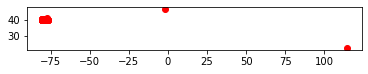

In [30]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

#Importing the dataset and loading into a geopandas dataframe for visualization
df = pd.read_csv ('SupermarketData.csv')
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Lon, df.Lat))

#Displays this dataset to the neighborhood map
hoods = gpd.read_file('City_of_Pittsburgh_Neighborhoods.shp')

# Makes plot and plots the gdf
ax = hoods.plot(
    color='white', edgecolor='black')
gdf.plot(ax=ax, color='red')

Well this is awkward, why isn't the map showing up?

Well, for some reason two datapoints aren't where they should be. We can find them below by searching for points outside of the area around longitude -80 (where Pittsburgh is).

In [31]:
for ind in df.index:
    if df['Lon'][ind] < -95 or df['Lon'][ind] > -65:
        print(df['Lat'][ind], df['Lon'][ind])

47.15441 -2.172958
22.335921 114.139154


These two points happen to be located in a random house in La Plaine-sur-Mer, France, and the Delia Memorial School (Broadway) in Hong Kong. What does this mean? Well, it's obvious of course.

![](Pitt1.png)
![](Pitt2.png)
(Yes I really edited a wikipedia article for this)

Jokes aside, this is easy to move past with the code below

<AxesSubplot:>

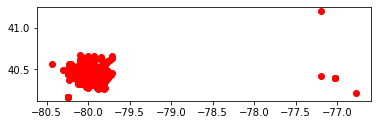

In [32]:
for ind in df.index:
    if df['Lon'][ind] < -95 or df['Lon'][ind] > -65:
        df = df.drop(ind)
    
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Lon, df.Lat))
hoods = gpd.read_file('City_of_Pittsburgh_Neighborhoods.shp')
ax = hoods.plot(
    color='white', edgecolor='black')
gdf.plot(ax=ax, color='red')

Turns out this dataset kinda sucks at being from only Allegheny county, and its easier to just use zip codes from Pittsburgh anyway (I just wanted to showcase my annoyance with every person who has ever published a dataset I've had to use)

<AxesSubplot:>

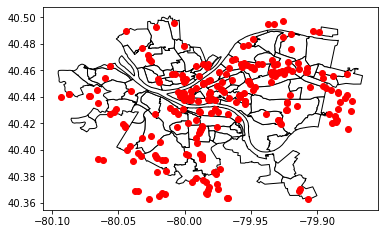

In [99]:
df2 = pd.read_csv ('ZipCodes.csv')

for ind in df.index:
    check = False
    for t in df2.index:
        if df['Zip'][ind] == df2['Zip Code'][t]:
            check = True
    if check == False or df['Lat'][ind] > 40.5 or df['Lon'][ind] > -79.87 or df['Lon'][ind] < -80.11:
        df = df.drop(ind)
        
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Lon, df.Lat))
hoods = gpd.read_file('City_of_Pittsburgh_Neighborhoods.shp')
ax = hoods.plot(
    color='white', edgecolor='black')
gdf.plot(ax=ax, color='red')

With this nice little visualization, all that really needs to be done is to match this data up with the neighborhoods. Unfortunately, this is a bit of a pain to do, but such is the life of a programmer.

In [103]:
myDict = {}

#Stuffs all of the zipcode data into a dictionary matching frequency with codes
for ind in df.index:
    for t in df2.index:
        if df['Zip'][ind] == df2['Zip Code'][t]:
            value = df['Zip'][ind]
            #Check if the item is already in the dict
            if value in myDict:
                myDict[value] += 1
            #Otherwise add it if it wasn't found
            else:
                 myDict[value] = 0
                
secDict = {}
#Matches those zipcode frequencies with neighborhood names
for item in myDict:
    for ind in df2.index:
        if df2['Zip Code'][ind] == item:
            for r in range(6):
                if r == 0:
                    value = df2['Area'][ind]
                elif r == 1:
                    value = df2['Area2'][ind]
                elif r == 2:
                    value = df2['Area3'][ind]
                elif r == 3:
                    value = df2['Area4'][ind]
                elif r == 4:
                    value = df2['Area5'][ind]
                else:
                    value = df2['Area6'][ind]
                    
                if value is not 'null':
                    if value in secDict:
                        secDict[value] += myDict[item]
                    else:
                        secDict[value] = myDict[item]
        
#Removes NaN and low counts
finalDict = {}
for item in secDict:
    if secDict[item] != 822 and secDict[item] >= 16:
        finalDict[item] = secDict[item]
        
sf = pd.Series(finalDict, name='Count')

sf.head(14)

BROADHEAD           19
DOWNTOWN            20
KNOXVILLE           17
BELTZHOOVER         17
CARRICK             31
ARLINGTON           51
UPTOWN              16
HERRON HILL         16
SCHENLEY HEIGHTS    16
NORTHSIDE           19
OVERBROOK           26
EAST LIBERTY        16
MORNINGSIDE         16
OAKLAND             16
Name: Count, dtype: int64

And voila, looks like the top 3 are Arlington, Carrick, and Overbrook (rip for my implicit downtown and strip bias).